## Week 9: ggplot2 (Part II)

Last week we covered the basics of constructing layered and colorful visualizations usin ggplot2. Today's lecture will continue our discussion and we will...

<ol>
    <li>
        Cover some nuances of ggplot's aesthetic mappings.
    </li>
    <li>
        Go over how layers inherit attributes from their predecessors.
    </li>
    <li>
        Learn how to layer regression lines on a scatter plot.
    </li>
    <li>
        Do example problems for all three, of course.
    </li>
    <li>
        Get a quick introduction to R Shiny Applications.
    </li>
</ol>

### More on Aesthetic Mapping

We ended last lecture by creating the visualization below.

<img src="visAides/crimePlot.png" width="500">

With this code provided below. Look closely at the italicized and embolded portions. You'll notice that we have some aesthetic mappings inside <code>aes()</code> and some outside. <code>X, Y, and Category</code> are <strong>inside</strong> <code>aes()</code> because those attributes are mapped to variables of the <code>lessCrimes</code> dataframe. Conversely, <code>size</code> and <code>alpha</code> are <strong>outside</strong> <code>aes()</code> because they are mapped to what are essentially constant values. For example, an observation will be positioned by its <code>X</code> and <code>Y</code> values, and its point colored by its <code>Category</code> value. But <strong>every single</strong> observation will have <code>size=0.9</code> and <code>alpha=0.3</code>

<code>
ggmap(SFmap) +
    geom_point(aes(<strong>x=X</strong>, <strong>y=Y</strong>, <strong>color=Category</strong>), <em><strong>size=0.9</strong></em>, <em><strong>alpha=0.3</strong></em>, data=lessCrimes) +
    scale_x_continuous(limits=c(-122.518307, -122.355789)) +
    scale_y_continuous(limits=c(37.7047, 37.823)) +
    guides(colour = guide_legend(override.aes = list(alpha=1.0, size=6.0), title="Type of Crime")) +
    ggtitle("Heat Map of Crimes")  +
    xlab("Latitude") +
    ylab("Longitude")
</code>

<em><strong>Aside:</strong> The use of <code>alpha</code> and <code>size</code> in <code>guide_legend()</code> is just overriding the aesthetics of the points in the legend. Otherwise they would be small and transparent in the legend.</em>

#### Make this plot from scratch!

You will need to map some aesthetics inside <code>aes()</code> and some outside. Remember that constant values are mapped <strong>outside</strong> <code>aes()</code>.

<img src="visAides/copyPlot.png" width="500">

In [20]:
options(repr.plot.width=7, repr.plot.height=5)
library(ggplot2)
library(plyr)
library(dplyr)

# Make a plot that exactly resembles the ggplot of iris shown above.
# Spend ~5 minutes on this. Help a partner if you finish early.

<FILLIN>

ERROR: Error in parse(text = x, srcfile = src): <text>:6:1: unexpected '<'
5: 
6: <
   ^


## Layer Inheritance

So far, our ggplots have had more or less the general form:

<code>ggplot(<em>aDataframe</em>) +
    geom_<em>something</em>(aes(x=..., y=..., fill=..., ...)
</code>

And this is because our plots have largely consisted of one layer. Or if there was a second visual layer... it was a street map. If we want to layer a linear model on top of a scatterplot, then we need to have something like this: 

<code>ggplot(<em>aDataframe</em>) +
    geom_point(aes(x=..., y=..., fill=..., ...) +
    geom_smooth(aes(x=..., y=...))
</code>

Notice that we had to repeat ourselves and put <code>aes(x=..., y=...)</code> twice! Remember that your code should be DRY--if you're repeating yourself, there is almost always a better way to do it. The same rule applies here. Since the x and y mappings are the same for the scatterplot and linear model, we can put this in the base layer. Subsequent layers will inherent this mapping.

<code>ggplot(<em>aDataframe</em>, aes(x=..., y=...)) +
    geom_point(aes(fill=...)) +
    geom_smooth()
</code>

In [48]:
# Using redundant syntax:
p1 <- ggplot(diamonds) +
        geom_point(aes(x=carat, y=price, color=clarity), alpha=0.3) +
        geom_smooth(aes(x=carat, y=price))

# Improved syntax:
p2 <- ggplot(diamonds, mapping=aes(x=carat, y=price)) +
        geom_point(aes(color=clarity), alpha=0.3) +
        geom_smooth()

# Feel free to print p1 to confirm their equality.
p2

ERROR: Error in p1 == p2: comparison of these types is not implemented


`geom_smooth()` using method = 'gam'


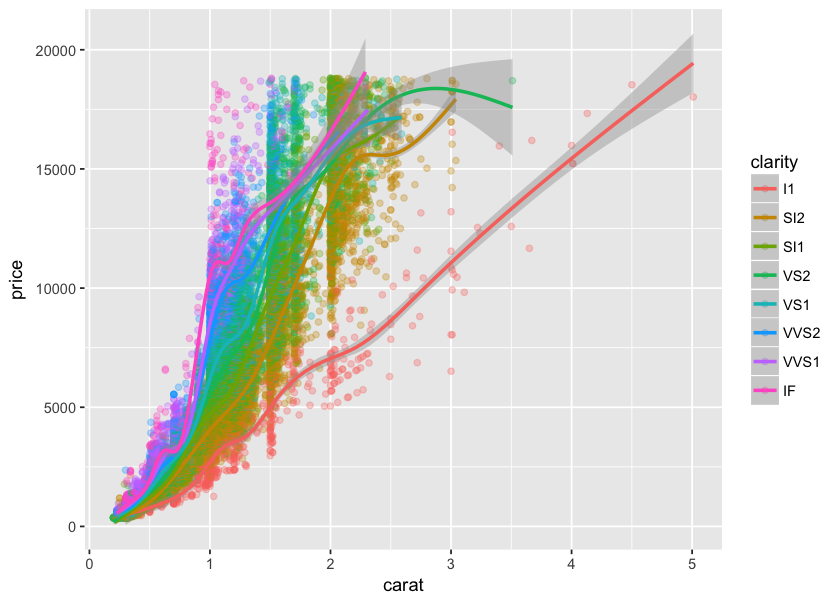

In [50]:
# Modify this code so it plots a regression line for
# each factor level in "clarity".

ggplot(diamonds, mapping=aes(x=carat, y=price, color=clarity)) +
        geom_point(alpha=0.3) +
        geom_smooth()

### Regression Lines in ggplot2

In the last code chunk we did not specify the type of regression line to fit. You probably noticed the warning message that <code>geom_smooth()</code> output. Since we have a large dataset (>1000) the function chose to use a <strong>g</strong>eneralized <strong>a</strong>dditive <strong>m</strong>odel, or "gam".

By specifying <code>geom_smooth(method="<em>x</em>")</code> we can force geom_smooth to use a specified model type. We can chose from...

<ul>
    <li>
        <code>"lm"</code> for a good 'ol linear model.
    </li>
    <li>
        <code>"glm"</code> for generalized linear model. You can then specify the link function:
            <code>geom_smooth(method = "glm", method.args = list(family = "binomial"), ...)</code>
    </li>
    <li>
        <code>"loess"</code> for a <a href="https://en.wikipedia.org/wiki/Local_regression">local regression</a> model.
    </li>
    <li>
        <code>"rlm"</code> for a robust linear model as described by Venables & Ripley.
    </li>
</ul>

And to plot seperate regression lines for each factor level in a variable, just leave color mapped to that variable. Just like we did in the previous example!

In [52]:
# Modify your last chunk of code to use a series
# of linear models instead

<FILLIN>

# Which looks like the better fit?

ERROR: Error in parse(text = x, srcfile = src): <text>:4:1: unexpected '<'
3: 
4: <
   ^


## Shiny Applications

Open up "ui.R" and "server.R" in RStudio. They're in the directory with all these Jupyter notebooks.